In [187]:
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns

Traning Data

In [188]:
df = pd.read_csv("../avg/all_data.csv")

In [189]:
df.drop(columns=["sno"], inplace=True)
df.head()

,Unnamed: 0,AFRDifference[AFR],BatteryVoltage[BatteryVoltage],EngineRunningTime[Time_s],IgnitionTiming[Angle],AirTemp[Temperature],CoolantTemp[Temperature],MAPSource[Pressure],LambdaSensor1[AFR],BaseFuel[Percentage],BaseIgnition[AngleIgnSprt2K],IgnitionCoolantTempCorrection[AngleOffset10deg],IgnitionAirTempCorrection[Angle],RPM[EngineSpeed]
0,0,49.366667,13117.956000,169.325333,234.240000,3025.220000,3273.185333,435.850667,947.790667,409.857333,314.857333,168.356000,49.534667,1480.309333
1,1,65.718667,13112.725333,230.282667,181.676000,3050.869333,3335.005333,523.414667,929.182667,473.272000,292.830667,142.698667,46.049333,1794.726667
2,2,75.470667,13148.148000,291.270667,195.848000,3075.520000,3370.689333,439.125333,922.978667,404.854667,306.161333,144.117333,45.597333,1531.942667
3,3,69.436000,13139.829333,352.062667,209.702667,3097.037333,3403.994667,372.801333,930.444000,353.442667,318.649333,145.018667,46.034667,1220.672000
4,4,70.928000,13146.782667,412.816000,199.154667,3116.424000,3455.920000,364.829333,928.985333,355.814667,318.990667,135.025333,45.145333,1239.245333


In [190]:
features = [
    'IgnitionTiming[Angle]', 
    'MAPSource[Pressure]', 
    'RPM[EngineSpeed]', 
    'AFRDifference[AFR]', 
    'BatteryVoltage[BatteryVoltage]', 
    'AirTemp[Temperature]', 
    'CoolantTemp[Temperature]', 
    'LambdaSensor1[AFR]', 
    'BaseFuel[Percentage]', 
    'BaseIgnition[AngleIgnSprt2K]'
]

df_feature = df[features]

In [191]:
epsilon = 0.5
minSample = 500
scaler = preprocessing.MinMaxScaler().fit(df_feature)
df_scaled = scaler.transform(df_feature)
dbscan = DBSCAN(eps=epsilon, min_samples=minSample).fit(df_scaled)

[[0.24623703 0.53598415 0.15881616 ... 0.16660904 0.45860473 0.28687273]
 [0.62771198 0.73936442 0.15452025 ... 0.06067406 0.52745614 0.07272727]
 [0.7880822  0.68301079 0.29210013 ... 0.17396614 0.76989345 0.67272727]
 ...
 [0.17506319 0.52824022 0.34492605 ... 0.37501379 0.53992864 0.24821818]
 [0.20076061 0.32240855 0.22152042 ... 0.38052427 0.34436796 0.29648485]
 [0.18890321 0.18222247 0.19009446 ... 0.4026593  0.1867406  0.32449018]]
   IgnitionTiming[Angle]  MAPSource[Pressure]  RPM[EngineSpeed]  \
0                  144.2               358.77            1326.7   

   AFRDifference[AFR]  BatteryVoltage[BatteryVoltage]  AirTemp[Temperature]  \
0                12.0                         12885.4               3075.52   

   CoolantTemp[Temperature]  LambdaSensor1[AFR]  BaseFuel[Percentage]  \
0                   3604.35                 987                359.55   

   BaseIgnition[AngleIgnSprt2K]  
0                        320.05  
<bound method BaseEstimator.get_params of DBSCA

<AxesSubplot: >

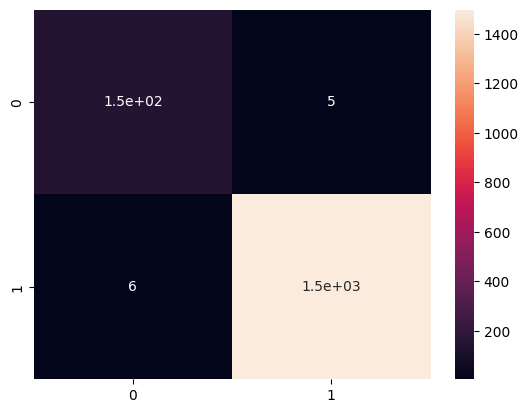

In [192]:
test_data = pd.read_csv("../test_data.csv")
test_data_feature = test_data[features]
scaler = preprocessing.MinMaxScaler().fit(test_data_feature)
test_data_scaled = scaler.transform(test_data_feature)
print(test_data_scaled)

data = {
    'IgnitionTiming[Angle]':  [144.20 ], 
    'MAPSource[Pressure]': [358.77], 
    'RPM[EngineSpeed]': [1326.70], 
    'AFRDifference[AFR]': [12.0], 
    'BatteryVoltage[BatteryVoltage]': [12885.4], 
    'AirTemp[Temperature]': [3075.52], 
    'CoolantTemp[Temperature]': [3604.35], 
    'LambdaSensor1[AFR]':[987], 
    'BaseFuel[Percentage]':[359.55], 
    'BaseIgnition[AngleIgnSprt2K]':[320.05]
}

df_me = pd.DataFrame(data)

df_me_f = df_me[features]
print(df_me_f)


# df_me_f = df_me_f.to_numpy()
# df_me_f = df_me_f.reshape(1,-1)
# scaler1 = preprocessing.MinMaxScaler().fit(df_me_f)
# df_me_f_scaled = scaler.transform(df_me_f)
l = dbscan.get_params
print(l)

result_label = dbscan.fit_predict(test_data_scaled)


actual_label = list(test_data["cluster"])

matrix = metrics.confusion_matrix(actual_label, result_label)
accuracy = metrics.accuracy_score(actual_label, result_label)
recall = metrics.recall_score(actual_label, result_label,pos_label=-1)
# f1score = metrics.f1_score(actual_label, result_label,pos_label=-1)
print("Accuracy :"+ str(accuracy))
print("Recall :" + str(recall))
sns.heatmap(matrix,annot=True)
